In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# **** Algoritmo predictivo correspondiente a la turbidez de agua ****
#Los datos son almacenados para 1 Litro de agua
pHMedido = [7.25, 7.15, 6.3, 7.0, 6.1]
bicarbonatoAgregado = [1.6, 1.7, 2.2, 1.8, 2.3]

datos = pd.DataFrame({'Nivel de pH': pHMedido, 'Bicarbonato Agregado':bicarbonatoAgregado})
datos.head()



,Nivel de pH,Bicarbonato Agregado
0,7.25,1.6
1,7.15,1.7
2,6.30,2.2
3,7.00,1.8
4,6.10,2.3


Text(0.5, 1.0, 'Distribución regulación pH')

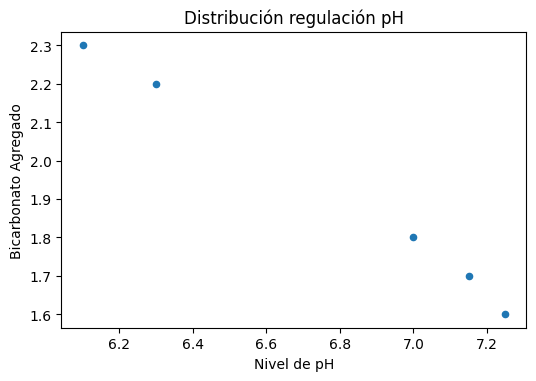

In [17]:
fig, ax = plt.subplots(figsize=(6, 3.84))
datos.plot(x='Nivel de pH', y='Bicarbonato Agregado', kind='scatter', ax=ax)
ax.set_title('Distribución regulación pH')

In [18]:
X = datos[["Nivel de pH"]]
y = datos["Bicarbonato Agregado"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.6,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)
prediccion = modelo.predict(X_test)

Intercept: [5.87408907]
Coeficiente: [('Nivel de pH', -0.582995951417004)]
Coeficiente de determinación R^2: 0.9931905432914832


C:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


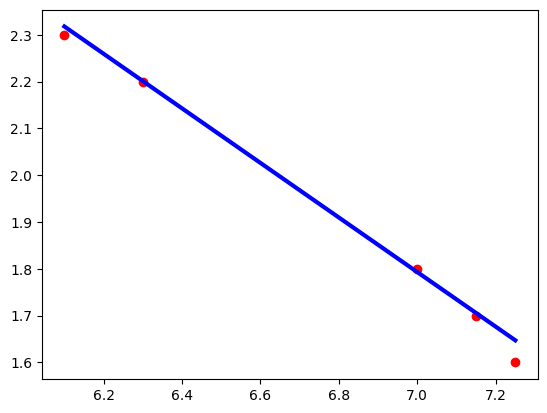

In [19]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))
plt.scatter(X, y, color = 'red')
plt.plot(X_test, prediccion, linewidth = 3, color = 'blue')